<a href="https://colab.research.google.com/github/FerDaniel0/Probabilidad-y-Es/blob/main/Unidad%201/practica6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilidad Y estadistica descriptiva de Base De Datos Dataset Autos
*Unidad 1*

*Alumno Juan Daniel Simenta Mendoza*

*Faciilitador Dr. Jose Gabriel Rodrigues Rivas*

Problema Para resolver el ejerncicio 6


1.- Cargar el Dataset de Autos y realizar las Estadísticas descriptivas básicas y medidas de tendencia central

In [104]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statistics import *

In [105]:
autos = pd.read_csv("autos2.csv", encoding = "ISO-8859-1")

In [106]:
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Valores Maximos y minimos de los precios de los autos

In [107]:
autos.price.max()

45400.0

In [108]:
autos.price.min()

5118.0

Media, mediana y moda de los precios de los autos

In [109]:
# Media
media = mean(autos.price)
print(media)

nan


In [110]:
# Mediana
mediana = median(autos.price)
print(mediana)

18150.0


In [111]:
# Moda
moda = multimode(autos.price)
print(moda)

[16500.0, 5572.0, 7957.0, 6229.0, 6692.0, 7609.0, 8921.0, 7295.0, 8845.0, 8495.0, 9279.0, 13499.0, 18150.0, 7775.0, 7898.0]


Desviación estandar de los precios de los autos

In [112]:
desviacion_estandar_precioa = autos.price.std()
print(desviacion_estandar_precioa)


7947.066341939271


Estadisticos y cuartiles de los precios de los autos

In [113]:
autos.price.describe()

,price
count,201.000000
mean,13207.129353
std,7947.066342
min,5118.000000
25%,7775.000000
50%,10295.000000
75%,16500.000000
max,45400.000000


# 2.-Realizar un Histograma de precios de los automóviles

In [114]:
import math

In [115]:
df = pd.DataFrame({'Precios': autos.price})
df

,Precios
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [116]:
# Calcular el número de intervalos utilizando la regla de Sturges
n = len(autos.price)
k = int( 1 + math.log2(100))
print("Valor de n = ", n , " \nNúmero de intervalos =", k)

Valor de n =  205  
Número de intervalos = 7


In [117]:
# Crear la tabla de frecuencias

tabla_frecuencia = pd.cut( df['Precios'], bins=k, include_lowest=True).value_counts().reset_index()
tabla_frecuencia.columns = ['Clase', 'Frec']
tabla_frecuencia

,Clase,Frec
0,"(5077.717, 10872.571]",105
1,"(10872.571, 16627.143]",49
2,"(16627.143, 22381.714]",26
3,"(33890.857, 39645.429]",7
4,"(28136.286, 33890.857]",6
5,"(22381.714, 28136.286]",5
6,"(39645.429, 45400.0]",3


In [118]:
# Ordenar la tabla de frecuencia por el intervalo
tabla_frecuencia = tabla_frecuencia.sort_values(by='Clase')
tabla_frecuencia

,Clase,Frec
0,"(5077.717, 10872.571]",105
1,"(10872.571, 16627.143]",49
2,"(16627.143, 22381.714]",26
5,"(22381.714, 28136.286]",5
4,"(28136.286, 33890.857]",6
3,"(33890.857, 39645.429]",7
6,"(39645.429, 45400.0]",3


In [119]:

# Generar columnas siguientes
tabla_frecuencia['Frec Rel'] = tabla_frecuencia['Frec'] / n
tabla_frecuencia['Frec Porc'] = tabla_frecuencia['Frec'] / n * 100
tabla_frecuencia['Frec Ac'] = tabla_frecuencia['Frec'].cumsum()
tabla_frecuencia['Frec Rel Ac'] = tabla_frecuencia['Frec Rel'].cumsum()
tabla_frecuencia['Frec Porc Ac'] = tabla_frecuencia['Frec Porc'].cumsum()

# Mostrar la tabla de frecuencia
print(tabla_frecuencia)


                    Clase  Frec  Frec Rel  Frec Porc  Frec Ac  Frec Rel Ac  \
0   (5077.717, 10872.571]   105  0.512195  51.219512      105     0.512195   
1  (10872.571, 16627.143]    49  0.239024  23.902439      154     0.751220   
2  (16627.143, 22381.714]    26  0.126829  12.682927      180     0.878049   
5  (22381.714, 28136.286]     5  0.024390   2.439024      185     0.902439   
4  (28136.286, 33890.857]     6  0.029268   2.926829      191     0.931707   
3  (33890.857, 39645.429]     7  0.034146   3.414634      198     0.965854   
6    (39645.429, 45400.0]     3  0.014634   1.463415      201     0.980488   

   Frec Porc Ac  
0     51.219512  
1     75.121951  
2     87.804878  
5     90.243902  
4     93.170732  
3     96.585366  
6     98.048780  


Text(0, 0.5, 'Autos')

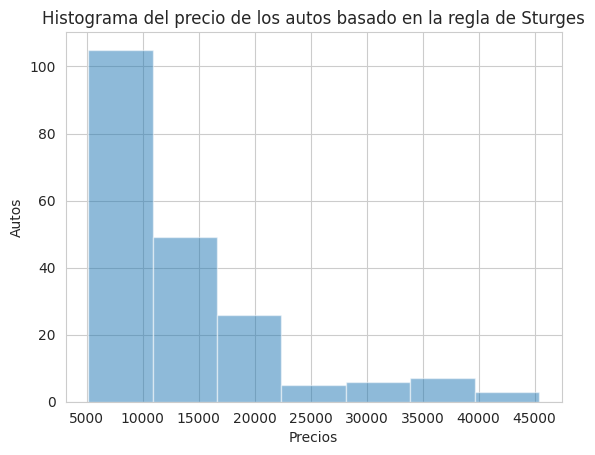

In [120]:

# Crear un histograma basado en la tabla de frecuencia
plt.hist(df['Precios'], bins=k, alpha = 0.5)
plt.title('Histograma del precio de los autos basado en la regla de Sturges')
plt.xlabel('Precios')
plt.ylabel('Autos')


# conclucion
los coches mas baratos son los que mas venden que son los que estan de 100 carros de 5000 a 15000 desoues de eso todo baja demasiado que son los 20000 en adelante ose los mas economicos son los que mas compran

# 3.- Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y tipo de vehículo (body style)

In [121]:
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
from enum import auto
autos = pd.read_csv("autos2.csv", encoding = "ISO-8859-1")

In [123]:
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


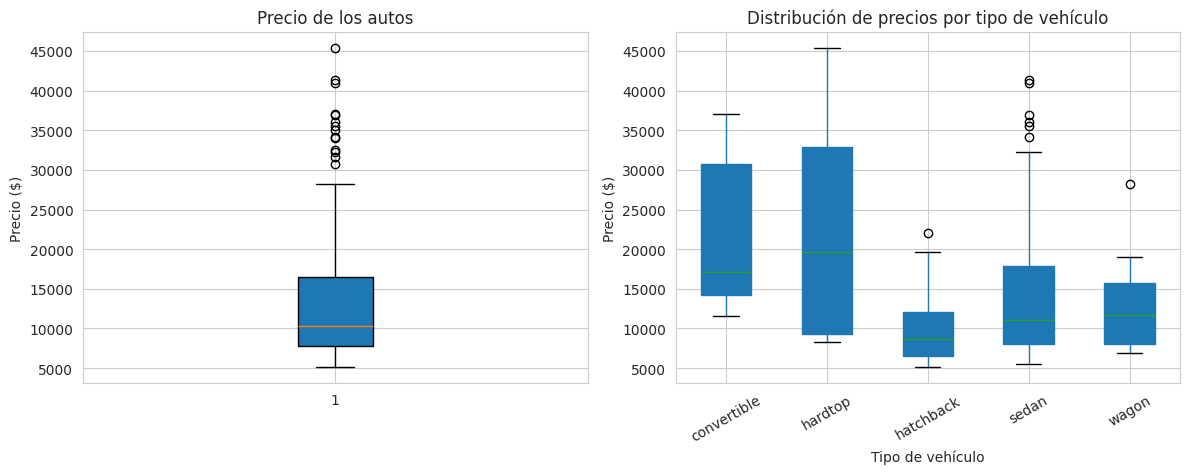

In [129]:

# Asegurar que price es numérico
autos["price"] = pd.to_numeric(autos["price"], errors="coerce")

# Crear subgráficos
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Diagrama de caja para el precio de los autos
bplot1 = ax1.boxplot(autos["price"].dropna(), vert=True, patch_artist=True)
ax1.set_title("Precio de los autos")
ax1.set_ylabel("Precio ($)")

# Diagrama de caja para precio según tipo de vehículo (bodystyle)
autos.boxplot(column="price", by="body-style", ax=ax2, patch_artist=True)
ax2.set_title("Distribución de precios por tipo de vehículo")
ax2.set_xlabel("Tipo de vehículo")
ax2.set_ylabel("Precio ($)")

# Ajustes finales
fig.suptitle("")  # Eliminar título automático
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**En conclusión, trabajar con bases de datos reales puede complicar las cosas debido a problemas como datos faltantes o errores en la detección de la información. En estos casos, es necesario buscar soluciones alternativas, como las que implementé. Lo mismo ocurrió con los diagramas de caja y bigotes (3, 4 y 5), que fueron los que presentaron más fallos. Sin embargo, en estos casos, buscar información en foros puede ayudar a encontrar la manera correcta de procesar los datos. Fuera de eso, todo bien.**

# 4 Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y tipo tracción ruedas (drive wheels)

<ipython-input-127-673dda13fdda>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="drive-wheels", y="price", data=autos, palette="coolwarm")


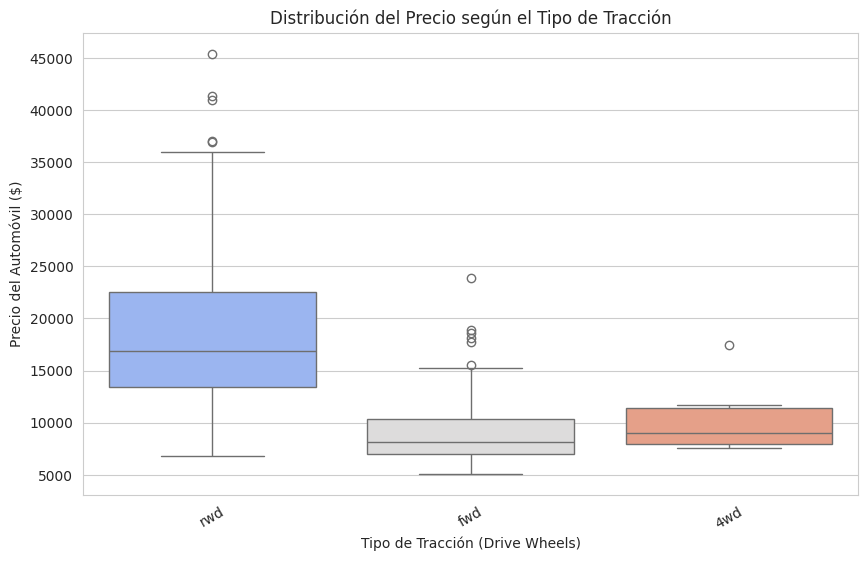

In [127]:
# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Crear un diagrama de caja para 'price' vs 'drive-wheels'
plt.figure(figsize=(10, 6))
sns.boxplot(x="drive-wheels", y="price", data=autos, palette="coolwarm")

# Configuración de etiquetas y título
plt.xlabel("Tipo de Tracción (Drive Wheels)")
plt.ylabel("Precio del Automóvil ($)")
plt.title("Distribución del Precio según el Tipo de Tracción")

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=30)

# Mostrar gráfico
plt.show()

**En conclusión, trabajar con bases de datos reales puede complicar las cosas debido a problemas como datos faltantes o errores en la detección de la información. En estos casos, es necesario buscar soluciones alternativas, como las que implementé. Lo mismo ocurrió con los diagramas de caja y bigotes (3, 4 y 5), que fueron los que presentaron más fallos. Sin embargo, en estos casos, buscar información en foros puede ayudar a encontrar la manera correcta de procesar los datos. Fuera de eso, todo bien.**

#5 Realizar un diagrama de caja y bigotes que muestre la relación estadística entre la columna del precio del automóvil (price) y la ubicación del motor (engine-location)

<ipython-input-128-ca4641f36d57>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="engine-location", y="price", data=autos, palette="coolwarm")


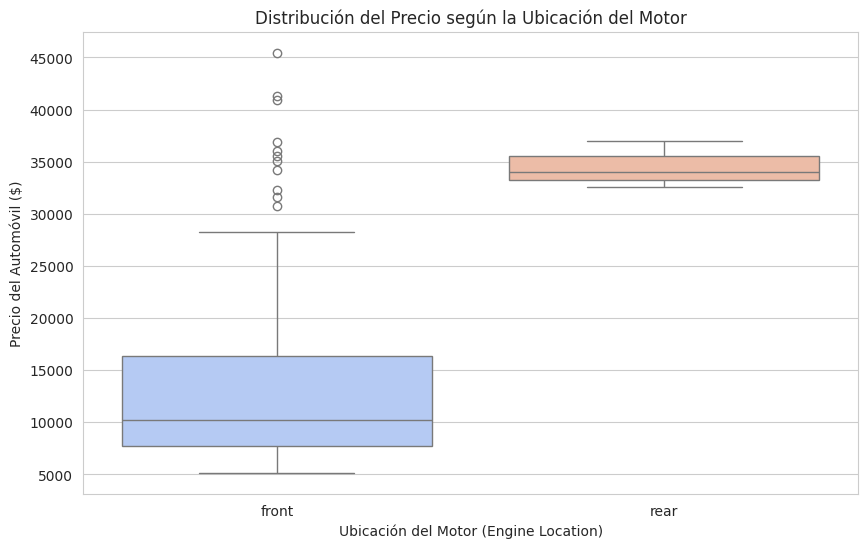

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Crear un diagrama de caja para 'price' vs 'engine-location'
plt.figure(figsize=(10, 6))
sns.boxplot(x="engine-location", y="price", data=autos, palette="coolwarm")

# Configuración de etiquetas y título
plt.xlabel("Ubicación del Motor (Engine Location)")
plt.ylabel("Precio del Automóvil ($)")
plt.title("Distribución del Precio según la Ubicación del Motor")

# Mostrar gráfico
plt.show()


# Conclusiones generales de la práctica
**Para terminar, la práctica estuvo muy bien. La verdad, nunca había trabajado con bases de datos reales, y ha sido una buena experiencia. Todo esto es útil para practicar y aprender a buscar información para resolver problemas, ya que a veces pueden surgir complicaciones y volverse molesto pero todo es una buena practica para un futuro hacer todo bien **